In [4]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results
from post_processing import best_PCA, get_training_times, get_training_rand_scores, get_best_estimators, execute_estimators, get_testing_times, get_testing_rand_scores, get_n_clusters_testing, get_labels
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA, plot_clusters, plot_testing_time_vs_PCA

Loading the results of the tuning phase.

In [5]:
meanshift = load_tuning_results("MeanShift")
meanshift

{2: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.836957849616003,
  624.3738269805908,
  16),
 12: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.899709272063889,
  1077.4700808525085,
  26290),
 22: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8997231520934861,
  1246.5787098407745,
  27548),
 32: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8997226290409002,
  1519.7534310817719,
  27875),
 42: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8997228586737428,
  1626.4553389549255,
  27953),
 52: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8997234965427501,
  1816.1683793067932,
  27982),
 62: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8997221697752149,
  1949.0305380821228,
  27993),
 72: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.89972173602429,
  2242.4365758895874,
  27993),
 82: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth'

Now we search for the PCA dimension corresponding to the best rand score.

Recall: mean_shift is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['bandwidth' : value], rand_score, training time, number of clusters).

In [6]:
best_PCA(meanshift)

The best PCA dimension is 202, with hyperparameters =  {'bandwidth': 5}


In [7]:
training_rand_scores = get_training_rand_scores(meanshift)
training_rand_scores

[0.836957849616003,
 0.899709272063889,
 0.8997231520934861,
 0.8997226290409002,
 0.8997228586737428,
 0.8997234965427501,
 0.8997221697752149,
 0.89972173602429,
 0.8997212257290842,
 0.8997215446635879,
 0.8997201668665322,
 0.8997212512438445,
 0.8997206261322175,
 0.8997219401423724,
 0.89971994999107,
 0.899720307197714,
 0.8997205240731763,
 0.8997189676727988,
 0.8997195927844258,
 0.8997181256857093,
 0.9072103947133418]

In [8]:
training_times = get_training_times(meanshift)
training_times

[624.3738269805908,
 1077.4700808525085,
 1246.5787098407745,
 1519.7534310817719,
 1626.4553389549255,
 1816.1683793067932,
 1949.0305380821228,
 2242.4365758895874,
 2295.18710398674,
 2492.8601417541504,
 2823.103540420532,
 2981.7640430927277,
 3186.190360069275,
 3405.690083026886,
 3599.618686914444,
 3883.019022703171,
 4100.844321012497,
 4189.797915935516,
 4429.280521869659,
 4890.710890054703,
 5894.492213010788]

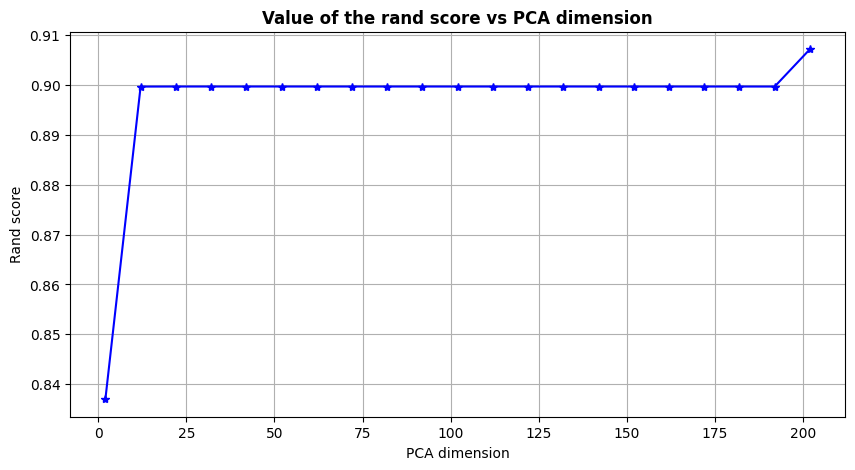

In [9]:
pca_dimensions = range(2,200+10,10)
plot_rand_score_vs_PCA(pca_dimensions, training_rand_scores)

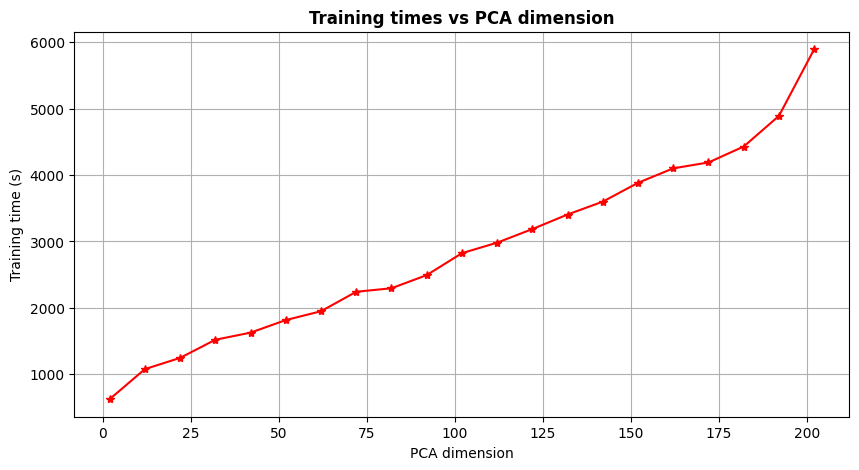

In [10]:
plot_training_time_vs_PCA(pca_dimensions, training_times)

In [11]:
best_estimators = get_best_estimators(meanshift)
testing_results = execute_estimators(best_estimators, "MeanShift", 200, 0.5)
testing_results

Executing MeanShift ..: 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]


{2: (0.8261903129018431,
  0.002838134765625,
  16,
  array([ 4,  8, 10, ..., 11,  2, 10])),
 12: (0.8998200151041985,
  0.7594842910766602,
  5855,
  array([23211, 14058, 21119, ..., 10333, 14975, 25702])),
 22: (0.8998293225562836,
  0.807758092880249,
  5929,
  array([14107,  6024, 19749, ..., 14803, 19508, 26785])),
 32: (0.8998303839323986,
  0.6882569789886475,
  5982,
  array([ 6198, 18861, 26779, ..., 24761, 15811, 27211])),
 42: (0.8998312820198804,
  0.6802191734313965,
  5976,
  array([16963, 19939,  1013, ...,  1776,  9431, 20656])),
 52: (0.8998314044863552,
  0.7428469657897949,
  5997,
  array([ 9030, 13123, 27909, ..., 23503, 27493,  2829])),
 62: (0.8998279346029024,
  0.6936559677124023,
  5924,
  array([ 1234, 18334, 27022, ...,  2521,  5326,  9592])),
 72: (0.899832139285204,
  0.750572919845581,
  5941,
  array([23461,  1464, 17616, ...,  8939, 23827, 20573])),
 82: (0.8998287102239095,
  0.7443282604217529,
  5938,
  array([19664, 21781, 24246, ..., 23536,  6046, 

In [12]:
testing_rand_scores = get_testing_rand_scores(testing_results)
testing_rand_scores

[0.8261903129018431,
 0.8998200151041985,
 0.8998293225562836,
 0.8998303839323986,
 0.8998312820198804,
 0.8998314044863552,
 0.8998279346029024,
 0.899832139285204,
 0.8998287102239095,
 0.899827403914845,
 0.8998269140489458,
 0.8998307105096647,
 0.8998287918682261,
 0.8998289551568591,
 0.8998281387136938,
 0.8998278937807442,
 0.8998278937807442,
 0.8998289551568591,
 0.8998295674892332,
 0.8998283428244851,
 0.9078607147959913]

In [13]:
testing_times = get_testing_times(testing_results)
testing_times

[0.002838134765625,
 0.7594842910766602,
 0.807758092880249,
 0.6882569789886475,
 0.6802191734313965,
 0.7428469657897949,
 0.6936559677124023,
 0.750572919845581,
 0.7443282604217529,
 0.781940221786499,
 0.7640628814697266,
 0.76055908203125,
 0.7853560447692871,
 0.8896420001983643,
 0.8547308444976807,
 0.8135628700256348,
 0.846602201461792,
 0.8616781234741211,
 0.8638038635253906,
 0.8169839382171631,
 0.24248290061950684]

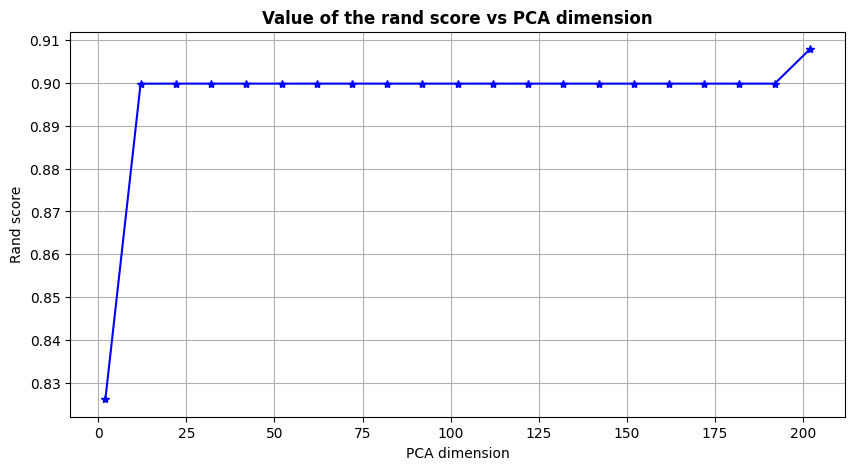

In [14]:
pca_dimensions = range(2,200+10,10)
plot_rand_score_vs_PCA(pca_dimensions, testing_rand_scores)

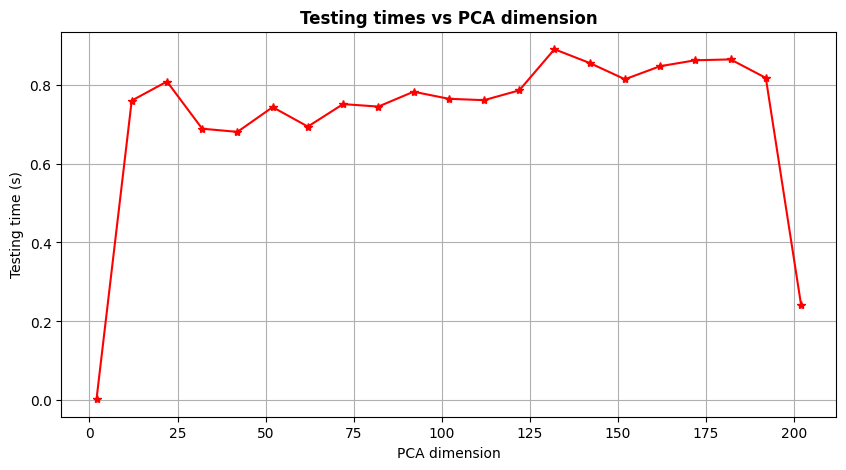

In [15]:
plot_testing_time_vs_PCA(pca_dimensions, testing_times)

In [16]:
labels = get_labels(testing_results)
labels

[array([ 4,  8, 10, ..., 11,  2, 10]),
 array([23211, 14058, 21119, ..., 10333, 14975, 25702]),
 array([14107,  6024, 19749, ..., 14803, 19508, 26785]),
 array([ 6198, 18861, 26779, ..., 24761, 15811, 27211]),
 array([16963, 19939,  1013, ...,  1776,  9431, 20656]),
 array([ 9030, 13123, 27909, ..., 23503, 27493,  2829]),
 array([ 1234, 18334, 27022, ...,  2521,  5326,  9592]),
 array([23461,  1464, 17616, ...,  8939, 23827, 20573]),
 array([19664, 21781, 24246, ..., 23536,  6046,  7305]),
 array([23629, 12131,  9734, ...,  2751, 19210,  4861]),
 array([21999, 24955, 18988, ...,  9535, 27880,  3304]),
 array([26867,  1729,  5568, ..., 22031, 12693,   168]),
 array([ 1544, 15614, 22157, ...,  1876, 23723,  9689]),
 array([ 9569, 20355, 24207, ..., 13654, 22688, 26620]),
 array([25451,   656, 24924, ..., 15110, 26365,  5911]),
 array([14294,  4577, 26911, ..., 27483,  8471, 10946]),
 array([12012,  8038, 19140, ...,  5135, 20793,  5535]),
 array([ 3634,  5955,  3116, ..., 24497, 14451,  

In [17]:
n_clusters = get_n_clusters_testing(testing_results)
n_clusters

[16,
 5855,
 5929,
 5982,
 5976,
 5997,
 5924,
 5941,
 5938,
 5897,
 5908,
 5969,
 5928,
 5918,
 5919,
 5906,
 5894,
 5939,
 5920,
 5941,
 2441]

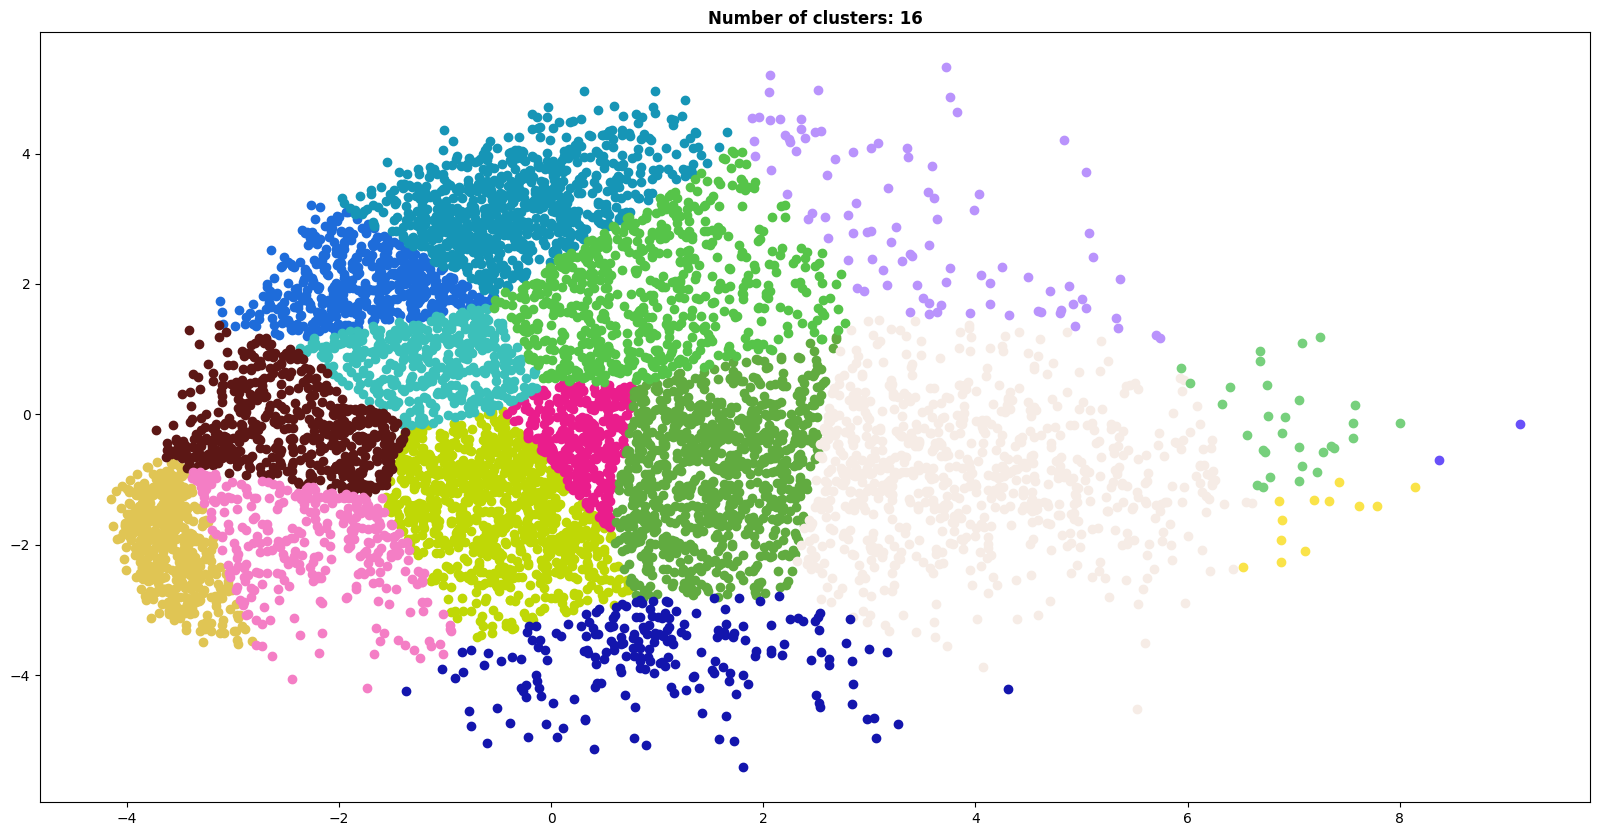

In [18]:
plot_clusters(0.5, n_clusters=n_clusters[0], labels=labels[0])